In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Simulation

Generate 1000 samples from two different classes of equal size
1. 500 samples from class 1 are generated here.

x_1 = [x_11, x_12]

In [ ]:
Number_of_points = 1000

mean = [-2.5, -2.5]

cov = [[1, 0], [0, 1]]

X_data = np.random.multivariate_normal(mean, cov, Number_of_points//2)
# print(X_data)
print(X_data.shape)

(500, 2)


In [ ]:
print(X_data)

2. A set of 500 samples from class 2 are generted here, by changing the mean of the cluster

In [ ]:
mean = [2.5,2.5]
# Create samples from class 2 with the above mean. Concatenate the samples from class 1 and class 2.
X_data = np.concatenate((X_data,np.random.multivariate_normal(mean, cov, Number_of_points//2)))

## Add class to the points generated
Y_data = np.zeros((Number_of_points,))
Y_data[Number_of_points//2:] = 1

## Training and Test Set Creation

In [ ]:
Number_of_training = int(Number_of_points*0.8)

Number_of_testing = int(Number_of_points*0.2)

## Randomly permute a sequence, or return a permuted range
index = np.random.permutation(Number_of_points)

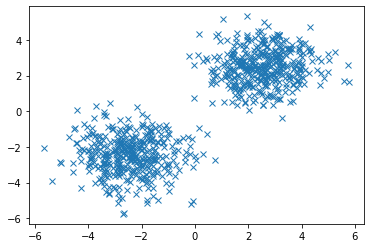

(800, 2) (800,)


In [ ]:
X_train = X_data[index[:Number_of_training]] 

Y_train = Y_data[index[:Number_of_training]]

## Plots the points generated
plt.plot(X_train[:,0],X_train[:,1],'x')

plt.show()

print(X_train.shape,Y_train.shape)

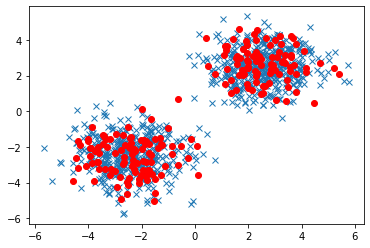

In [ ]:
X_test = X_data[index[Number_of_training:]]

Y_test = Y_data[index[Number_of_training:]]

## Plot train and test points in the same plot
plt.plot(X_train[:,0],X_train[:,1],'x')
## Add parameters for test points
plt.plot(X_test[:,0],X_test[:,1],'o',color='red')

plt.show()

## Learning a logisitc regression classifier

In [ ]:
# Import library
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
## ## Please note the default values e.g L-2  regularization by default
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, Y_train)

print("Accuracy on training data: %f"%(clf.score(X_train, Y_train)))

print("Accuracy on test data: %f"%(clf.score(X_test, Y_test)))

Accuracy on training data: 1.000000
Accuracy on test data: 0.995000


### Visualizing the decision boundary

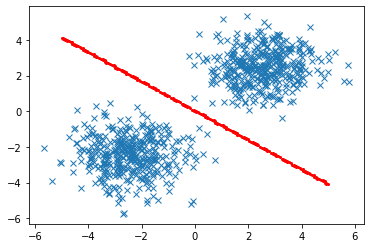

In [ ]:
eps = 0.0289
plt.plot(X_train[:,0],X_train[:,1],'x')
z 
for i in np.linspace(-5,5,150):
    for j in np.linspace(-5,5,150):
        pred = clf.predict_proba([[i,j]])[0]
        if pred[0] >=  0.5 - eps and pred[0] <=0.5 + eps and pred[1] >=  0.5 - eps and pred[1] <=0.5+eps:
            plt.plot(i,j,'o',color = 'red',markersize=2)
    
plt.show()
        

## Iris Dataset - Multiclass Classification

In [ ]:

from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
print(X.shape)
print(y)
print(list(load_iris().target_names))


(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa', 'versicolor', 'virginica']


In [ ]:
## Create a model for Logistic Regression as done above
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=200).fit(X,y)

print(clf.predict(X[:2, :]))
## predict_proba gives the probability estimates
print(clf.predict_proba(X[:1, :])) 
print(clf.score(X, y))

[0 0]
[[9.81583143e-01 1.84168427e-02 1.45011486e-08]]
0.9733333333333334


In [ ]:
new_observation = [[.5, .5, .5, .5]]
print(clf.predict(new_observation))
print(clf.predict_proba(new_observation))

[0]
[[9.98575782e-01 1.42420748e-03 1.00555016e-08]]


## Digits dataset - Multiclass Classification

In [ ]:
from sklearn.datasets import load_digits
## Each image is of size 8 X 8
digits = load_digits()

In [ ]:
print("Image Data Shape" , digits.data.shape)# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [ ]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

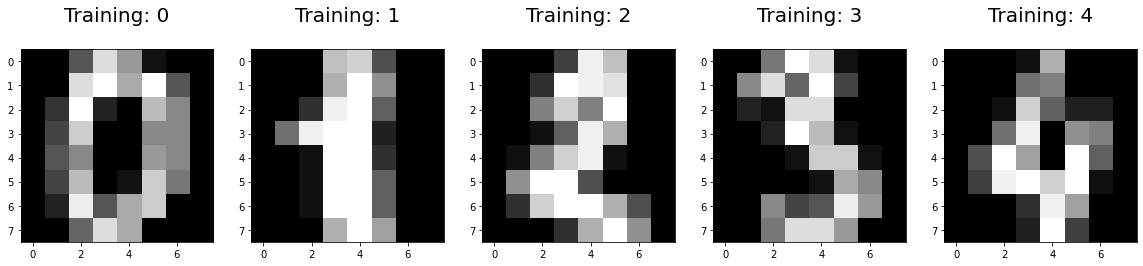

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
from sklearn.model_selection import train_test_split
## Create a train test split with test size 75-25 split.
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)


##### Hyperparameter Tuning - Method *1*

In [ ]:
## Method 1 
C = [0.0001, 0.001, 0.01, 0.1, 0.5]
for each_C in C:
  logisticRegr = LogisticRegression(C = each_C)
  logisticRegr.fit(x_train, y_train)
  score = logisticRegr.score(x_val, y_val)
  print("For C value {}, the score obtained is {}".format(each_C, score))




For C value 0.0001, the score obtained is 0.9305555555555556
For C value 0.001, the score obtained is 0.96875
For C value 0.01, the score obtained is 0.9826388888888888
For C value 0.1, the score obtained is 0.9791666666666666
For C value 0.5, the score obtained is 0.9791666666666666


In [ ]:
logisticRegr = LogisticRegression(C = 0.01)
logisticRegr.fit(x_train, y_train)
test_score = logisticRegr.score(x_test, y_test)
print(test_score)

0.9638888888888889


##### Hyperparameter tuning - Method 2 - Grid Search CV

In [ ]:
## Method 2
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['newton-cg', 'lbfgs'], 'penalty':['l1', 'l2'], 'max_iter':[100, 500], 'C':[0.01, 0.1]}
logisticRegr = LogisticRegression()
clf = GridSearchCV(logisticRegr, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1], 'max_iter': [100, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs']})

In [ ]:
print(clf.best_params_)

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
score = clf.score(x_test, y_test)
print(score)

0.9583333333333334


Text(0.5, 15.0, 'Predicted')

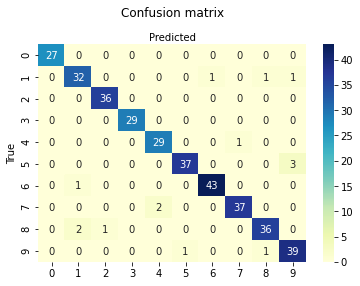

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y_pred = clf.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = list(range(10))
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Practice Session

## Heart Disease Prediction using Logistic Regression

https://www.kaggle.com/ronitf/heart-disease-uci



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.shape

(297, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [ ]:
print(df.condition.value_counts())

0    160
1    137
Name: condition, dtype: int64


<AxesSubplot:>

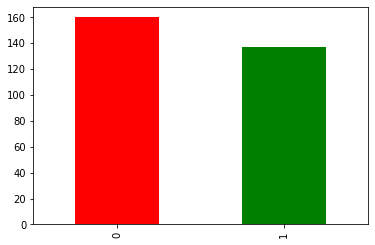

In [ ]:
df.condition.value_counts().plot(kind="bar", color=["red", "green"])

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [ ]:
for each_col in df.columns:
  print(each_col)
  print(df[each_col].unique())

age
[69 66 65 64 63 61 60 59 58 56 52 51 45 42 40 38 34 74 71 70 62 57 55 54
 50 49 48 46 44 41 35 29 76 68 67 53 47 43 39 37 77]
sex
[1 0]
cp
[0 1 2 3]
trestbps
[160 140 150 138 110 170 145 134 178 120 118 152 125 148 156 128 136 130
 124 154 135 132 108 192 101 105 112 126 122 180 115 146 155 102 172 100
  94 129 142 144 106 117 158 174 164 114 165 200 123 104]
chol
[234 239 226 282 211 227 233 240 270 288 273 204 283 193 186 298 213 264
 244 199 231 182 269 302 245 246 195 281 208 221 284 319 236 261 232 294
 250 262 342 309 325 201 205 271 266 229 197 160 308 263 219 220 295 203
 198 235 306 157 192 210 265 254 274 277 564 212 278 417 360 335 313 252
 243 185 318 178 218 230 224 340 168 126 256 258 214 304 267 196 222 175
 188 149 275 255 257 253 177 141 242 315 209 180 268 321 215 174 322 286
 299 237 223 228 225 248 303 407 330 187 164 394 260 307 166 207 206 293
 305 326 249 176 216 259 300 276 289 241 131 354 184 409 217 353 327 200
 311 169 290 341 247 172 167 183]
fbs
[1 0]
r

Text(0.5, 1.0, 'Distribution of cholesterol')

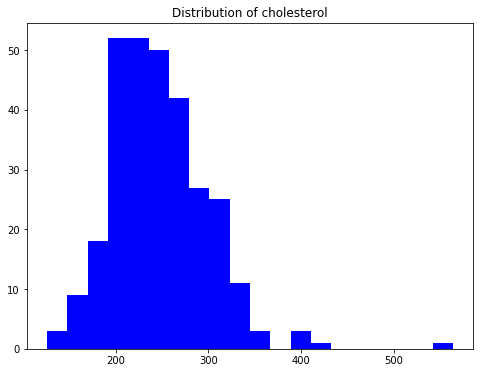

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(8, 6))

ax.hist(df['chol'], bins=20, facecolor='blue')
ax.set_title('Distribution of cholesterol')

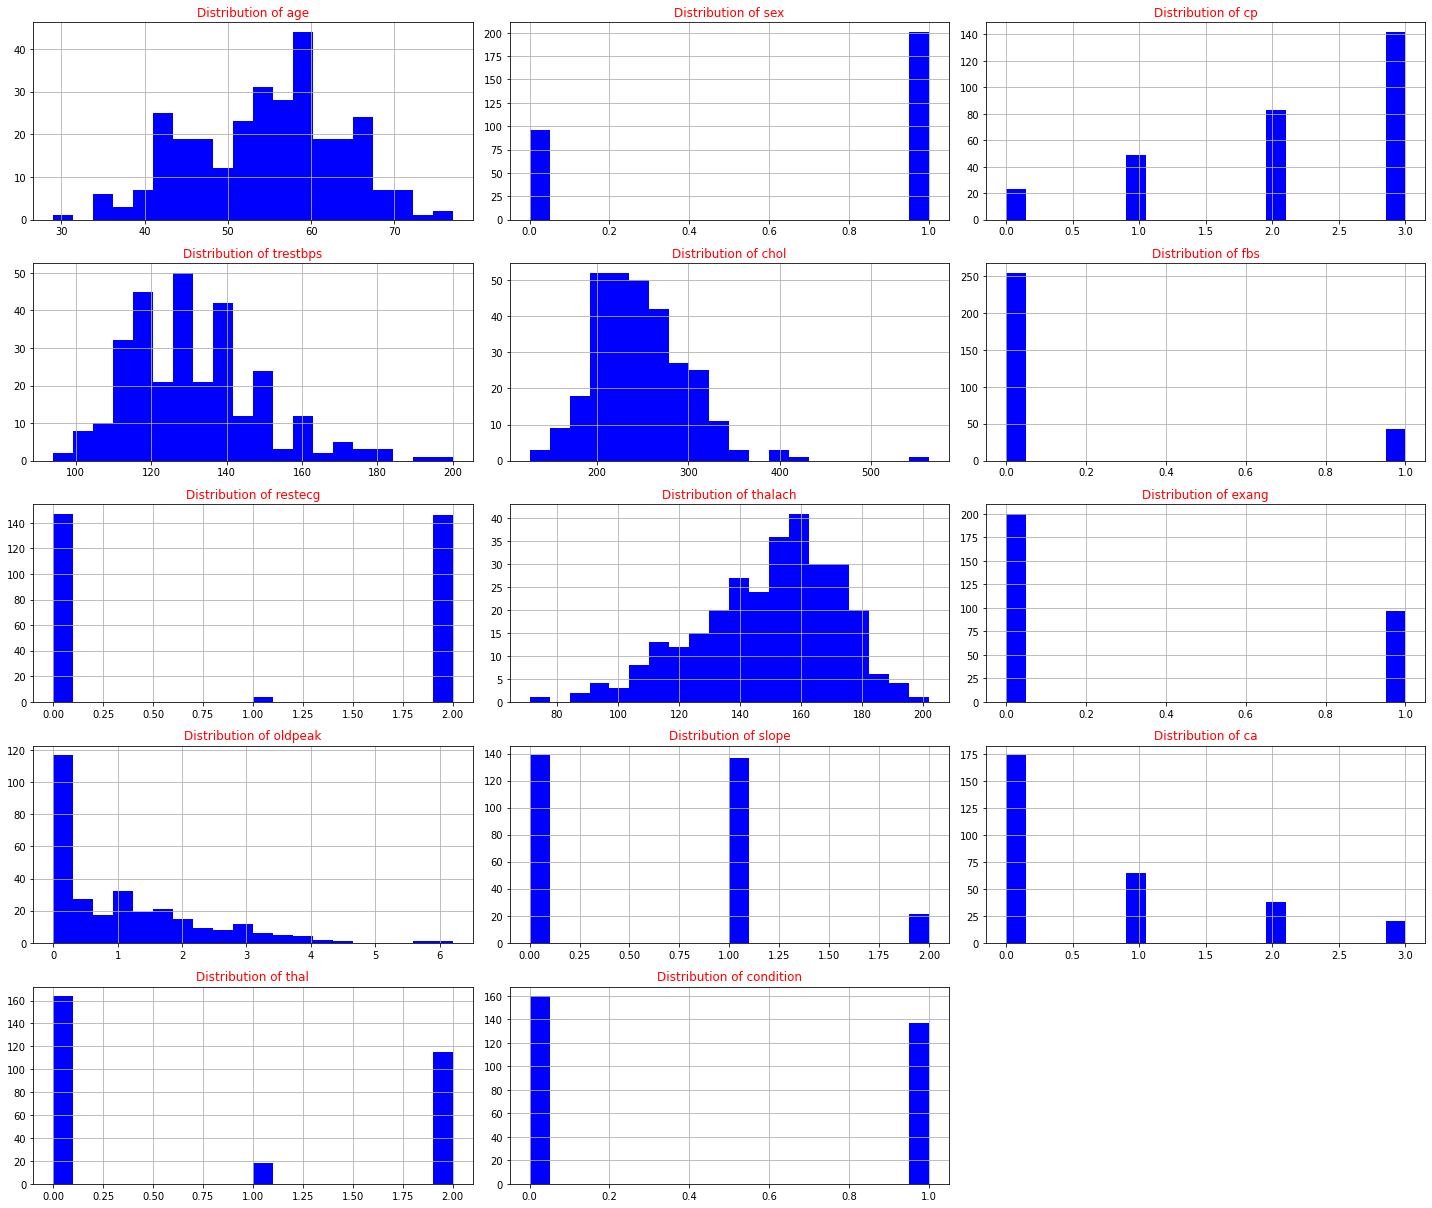

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='blue')
        ax.set_title("Distribution of " + feature,color='Red')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [ ]:
print(df[df['condition']==1]['chol'].min())

131


In [ ]:
print(df[df['condition']==0]['chol'].min())

126


In [ ]:
categorical_val = [] # not understood
continous_val = []
for column in df.columns:
    
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [69 66 65 64 63 61 60 59 58 56 52 51 45 42 40 38 34 74 71 70 62 57 55 54
 50 49 48 46 44 41 35 29 76 68 67 53 47 43 39 37 77]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [160 140 150 138 110 170 145 134 178 120 118 152 125 148 156 128 136 130
 124 154 135 132 108 192 101 105 112 126 122 180 115 146 155 102 172 100
  94 129 142 144 106 117 158 174 164 114 165 200 123 104]
chol : [234 239 226 282 211 227 233 240 270 288 273 204 283 193 186 298 213 264
 244 199 231 182 269 302 245 246 195 281 208 221 284 319 236 261 232 294
 250 262 342 309 325 201 205 271 266 229 197 160 308 263 219 220 295 203
 198 235 306 157 192 210 265 254 274 277 564 212 278 417 360 335 313 252
 243 185 318 178 218 230 224 340 168 126 256 258 214 304 267 196 222 175
 188 149 275 255 257 253 177 141 242 315 209 180 268 321 215 174 322 286
 299 237 223 228 225 248 303 407 330 187 164 394 260 307 166 207 206 293
 305 326 249 176 216 259 300 276 289 241 131 354 184 409 217 353 327 200
 311 169 290 341 247 172 167 183]
f

In [ ]:
print(categorical_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition']


In [ ]:
df.thal.unique()

array([0, 2, 1])

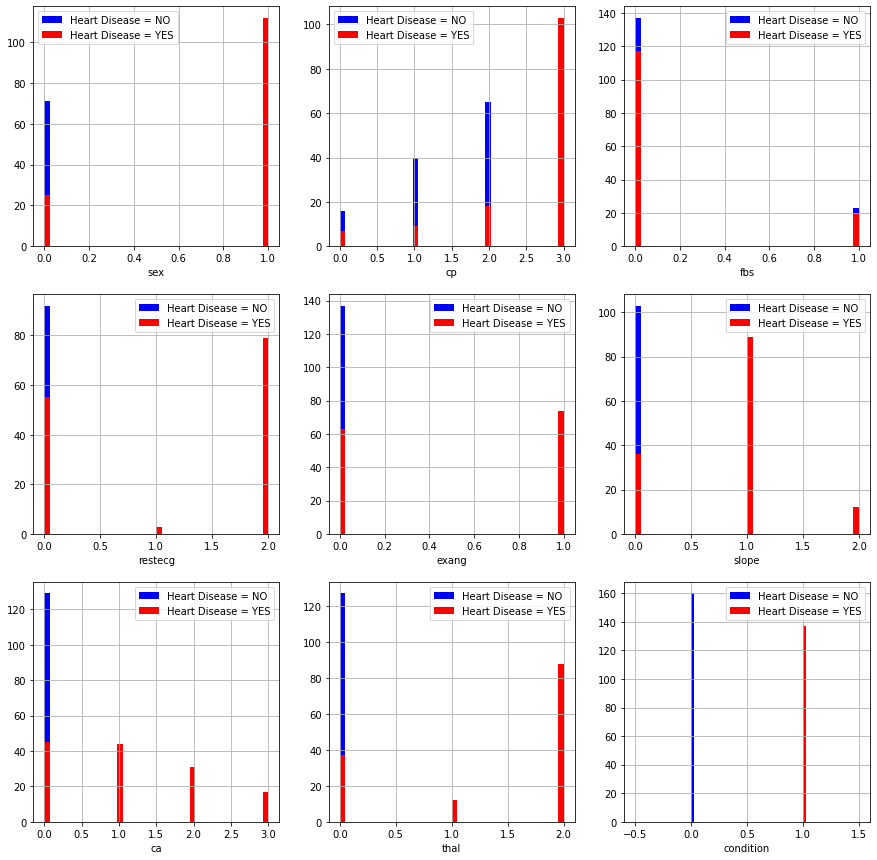

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["condition"] == 0][column].hist(bins=40, color='blue', label='Heart Disease = NO')
    df[df["condition"] == 1][column].hist(bins=40, color='red', label='Heart Disease = YES')
    plt.legend()
    plt.xlabel(column)

In [ ]:
categorical_val.remove('condition')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = dataset.drop('condition', axis=1)
y = dataset.condition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
pred = model.predict(X_test)
clf_report = classification_report(y_test, pred)
print("Test Result:\n========================================================")        
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("___________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("___________________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n") 

Test Result:
Accuracy Score: 83.33%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.87      0.84        31

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

_______________________________________________
Confusion Matrix: 
 [[23  6]
 [ 4 27]]

